In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [6]:
#Öncelikle kategorik değişkenleri dummy değişken formatına çevirmemiz gerekiyor
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [7]:
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [8]:
x_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [9]:
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

training = df.copy()
print("trainin",training.shape)

x_train (197, 19)
y_train (197,)
x_test (66, 19)
y_test (66,)
trainin (263, 20)


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [15]:
#fit_transform fonksiyonu fit ve transform fonksiyonları aynı anda yapar.
x_reduced_train = pca.fit_transform(scale(x_train))

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [16]:
x_reduced_train[:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [18]:
#Birinci bileşenin toplam veri setinde bulunan toplam değişkenliğin
#(varyansın) %38.18ini açıkladığı görülüyor.
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [19]:
lm = LinearRegression()

In [20]:
pcr_model = lm.fit(x_reduced_train,y_train)

In [21]:
pcr_model.intercept_

543.4834416243655

In [22]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [23]:
#PCR-Tahmin

y_pred = pcr_model.predict(x_reduced_train)
y_pred[:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [24]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564977

In [25]:
df["Salary"].mean()

535.9258821292775

In [26]:
r2_score(y_train,y_pred)

0.5770075250410178

In [27]:
pca2 = PCA()

In [28]:
x_reduced_test = pca2.fit_transform(scale(x_test))

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [29]:
y_pred = pcr_model.predict(x_reduced_test)

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.15753641499646

In [35]:
#Model Tuning

lm = LinearRegression()
pcr_model = lm.fit(x_reduced_train[:,:10],y_train)
y_pred = pcr_model.predict(x_reduced_test[:,:10])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

390.79142556822234


In [36]:
from sklearn import model_selection

In [40]:
cv_10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [41]:
lm = LinearRegression()

In [42]:
RMSE = []

In [43]:
#Her bir bileşen sayısı için k-katlı cross val işlemi uygulayıp buradaki hata 
#değerlerini elde edip daha sonra bize hangi bileşen sayısının daha az hata
#oluşturduğunun bilgisini bize sunmuş olucak.
for i in np.arange(1,x_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                      x_reduced_train[:,:i],
                                                      y_train.ravel(),
                                                      cv=cv_10,
                                                      scoring = 'neg_mean_squared_error'))
    RMSE.append(score)

In [44]:
RMSE

[array([295.43979279, 265.12929435, 356.29781386, 344.87932361,
        351.12806496, 434.162779  , 266.69856294, 401.98756516,
        376.85957436, 243.39744545]),
 array([329.85371979, 251.02510651, 358.26524872, 334.84297404,
        355.11953463, 422.35572386, 281.5109649 , 393.9802562 ,
        349.79269189, 227.62050956]),
 array([335.13326563, 250.03935282, 361.34117536, 324.3383217 ,
        354.60158063, 418.87512395, 278.74627049, 404.30159496,
        340.14170625, 235.23449154]),
 array([352.40514251, 271.00091559, 355.3645993 , 308.29668341,
        350.37696671, 403.98280292, 264.97296685, 402.14873905,
        375.90231094, 222.20261074]),
 array([346.5825774 , 269.06151378, 343.36017634, 308.26145218,
        337.98136356, 396.07274518, 277.18744642, 403.01495607,
        364.00815498, 218.99569882]),
 array([330.36373902, 276.17780372, 328.15164815, 290.21065718,
        340.12518197, 387.77266095, 282.92206132, 406.0139846 ,
        387.91972841, 209.49248247]),
 arr

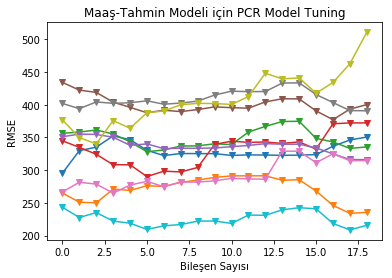

In [45]:
import matplotlib.pyplot as plt

plt.plot(RMSE,'-v')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş-Tahmin Modeli için PCR Model Tuning");